In [2]:
import numpy as np 
import pandas as pd
import networkx as nx
from graspy.utils import *
from graspy.embed import AdjacencySpectralEmbed
from graspy.plot import heatmap, pairplot
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
FONTSIZE=20

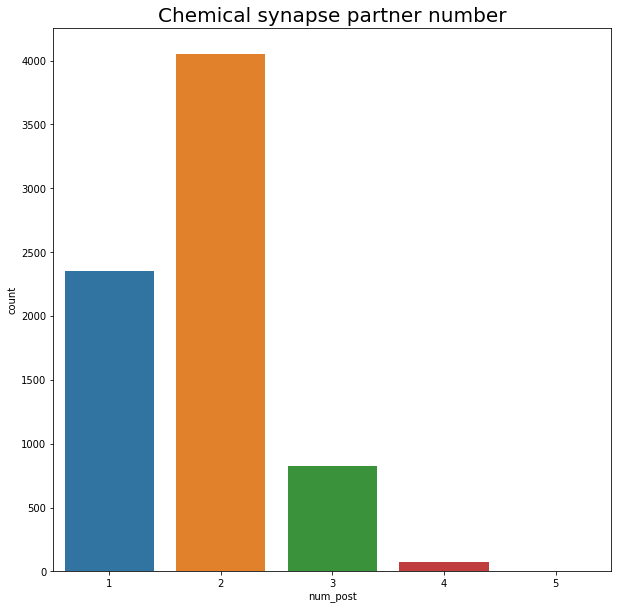

In [96]:
df = pd.read_excel('SI 3 Synapse lists.xlsx', sheet=0)
new_labels = ['num_contin', 'em_series', 'pre', 'all_post', 'type', 'sections',
 'num_post', 'post1', 'post2', 'post3', 'post4']
df.columns = new_labels
chem = df.loc[df['type'] == 'chemical']
elec = df.loc[df['type'] == 'electrical']
ax = plt.subplots(1,1, figsize=(10,10))[1]
sns.countplot(x='num_post', data=chem)
ax.set_title('Chemical synapse partner number', fontsize=FONTSIZE)

chem_1 = chem.loc[chem['num_post'] == 1]
chem_2 = chem.loc[chem['num_post'] == 2]
chem_3 = chem.loc[chem['num_post'] == 3]
chem_4 = chem.loc[chem['num_post'] == 4]
chem_5 = chem.loc[chem['num_post'] == 5]
chem_adics = [chem_1, chem_2, chem_3, chem_4, chem_5]

[2355, 4054, 827, 76, 6]

In [98]:
names = set()
for i, row in chem.iterrows():
    pre = row.pre
    post_names = re.split('[, .]', row.all_post)
    names.add(pre)
    [names.add(post) for post in post_names]
names.remove('')
cell_ids = np.unique(list(names))
inds = range(len(cell_ids))
cell_id_map = dict(zip(cell_ids,inds))
cell_id_map

{'ADAL': 0,
 'ADAR': 1,
 'ADEL': 2,
 'ADER': 3,
 'ADFL': 4,
 'ADFR': 5,
 'ADLL': 6,
 'ADLR': 7,
 'AFDL': 8,
 'AFDR': 9,
 'AIAL': 10,
 'AIAR': 11,
 'AIBL': 12,
 'AIBR': 13,
 'AIML': 14,
 'AIMR': 15,
 'AINL': 16,
 'AINR': 17,
 'AIYL': 18,
 'AIYR': 19,
 'AIZL': 20,
 'AIZR': 21,
 'ALA': 22,
 'ALML': 23,
 'ALMR': 24,
 'ALNL': 25,
 'ALNR': 26,
 'AQR': 27,
 'AS01': 28,
 'AS02': 29,
 'AS03': 30,
 'AS04': 31,
 'AS05': 32,
 'AS06': 33,
 'AS10': 34,
 'AS11': 35,
 'ASEL': 36,
 'ASER': 37,
 'ASGL': 38,
 'ASGR': 39,
 'ASHL': 40,
 'ASHR': 41,
 'ASIL': 42,
 'ASIR': 43,
 'ASJL': 44,
 'ASJR': 45,
 'ASKL': 46,
 'ASKR': 47,
 'AUAL': 48,
 'AUAR': 49,
 'AVAL': 50,
 'AVAR': 51,
 'AVBL': 52,
 'AVBR': 53,
 'AVDL': 54,
 'AVDR': 55,
 'AVEL': 56,
 'AVER': 57,
 'AVFL': 58,
 'AVFR': 59,
 'AVG': 60,
 'AVHL': 61,
 'AVHR': 62,
 'AVJL': 63,
 'AVJR': 64,
 'AVKL': 65,
 'AVKR': 66,
 'AVL': 67,
 'AVL.': 68,
 'AVM': 69,
 'AWAL': 70,
 'AWAR': 71,
 'AWBL': 72,
 'AWBR': 73,
 'AWCL': 74,
 'AWCR': 75,
 'BAGL': 76,
 'BAGR': 77,
 

In [99]:
adic_graphs = [nx.MultiDiGraph() for n in range(5)]
for i, row in chem.iterrows():
    pre = row.pre
    post_names = row.all_post.split(',')
    post_names = re.split('[, .]', row.all_post)
    for g in adic_graphs:
        g.add_node(pre)
        [g.add_node(post) for post in post_names]
    [adic_graphs[row.num_post - 1].add_edge(pre, post, weight=1) for post in post_names]
adic_As = [nx.to_numpy_array(g, nodelist=cell_ids) for g in adic_graphs]


In [100]:
def df_to_adjacency_undirected(df, nodelist, weight=1):
    rows = []
    for i, row in df.iterrows():
        post_names = re.split('[, .]', row.all_post)
        for a in post_names:
            # pre | post | weight
            rows.append([row.pre, a, weight])
    
    df_split = pd.DataFrame(rows, columns=['source', 'target', 'weight'])
    g = nx.MultiGraph()
    g = nx.from_pandas_edgelist(df_split, create_using=g)
    return nx.to_numpy_array(g, nodelist=cell_ids)

chem_A_undirected = df_to_adjacency_undirected(chem, cell_ids)

In [111]:
adic_counts

[2355, 4054, 827, 76, 6]

In [114]:
adic_undirected_graphs = [nx.MultiGraph() for n in range(5)]
adic_counts = np.zeros(5)
for i, row in chem.iterrows():
    pre = row.pre
    post_names = re.split('[, .]', row.all_post)
    for g in adic_graphs:
        g.add_node(pre)
        [g.add_node(post) for post in post_names]
    [adic_undirected_graphs[row.num_post
                            - 1].add_edge(pre,
                                          post,
                                          weight=1)
    for post in post_names]
    adic_counts[row.num_post-1] += 1

adic_undirected_As = [nx.to_numpy_array(g,
                                        nodelist=cell_ids) 
                      for g in adic_undirected_graphs]

In [102]:
# summing over the columns to get the degree of each node for any-adic
num_possible = np.sum(chem_A_undirected, axis=1) 
num_present = []
# for each adic-graph, getting the number that were actually made
[num_present.append(np.sum(A, axis=1)) 
 for ind, A in enumerate(adic_undirected_As)]


[None, None, None, None, None]

In [103]:
proportions = []
for adic_num_present in num_present:
    proportions.append(np.divide(adic_num_present, num_possible))

In [104]:
proportions

[array([0.17948718, 0.06493506, 0.2371134 , 0.30263158, 0.13461538,
        0.16239316, 0.21      , 0.1796875 , 0.55555556, 0.39622642,
        0.25477707, 0.30573248, 0.09865471, 0.0995671 , 0.10169492,
        0.08333333, 0.2826087 , 0.25      , 0.29752066, 0.29770992,
        0.13852814, 0.19018405, 0.375     , 0.41176471, 0.7       ,
        0.10526316, 0.22222222, 0.26027397, 0.06818182, 0.0212766 ,
        0.08108108, 0.11904762, 0.06060606, 0.06896552, 0.18181818,
        0.        , 0.25233645, 0.24      , 0.27777778, 0.38636364,
        0.19642857, 0.15454545, 0.24489796, 0.25806452, 0.30952381,
        0.46153846, 0.22727273, 0.359375  , 0.20430108, 0.26027397,
        0.10224949, 0.09643606, 0.16363636, 0.23111111, 0.07619048,
        0.06694561, 0.07377049, 0.10084034, 0.12643678, 0.16883117,
        0.13513514, 0.08450704, 0.1       , 0.16483516, 0.04210526,
        0.19101124, 0.23076923, 0.19565217, 0.21052632, 0.17647059,
        0.21276596, 0.17391304, 0.18032787, 0.13

In [105]:
mean_adic_proportions = [prop.sum()/len(cell_ids) for prop in proportions]
mean_adic_proportions

[0.2123474062948958,
 0.5867748492858812,
 0.17090629507302546,
 0.01866145522394261,
 0.01130999412225487]

In [128]:
2*list(range(1,6))

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [130]:
5*['mean cell proportion'] + 5*['overall proportion']


['mean cell proportion',
 'mean cell proportion',
 'mean cell proportion',
 'mean cell proportion',
 'mean cell proportion',
 '',
 '',
 '',
 '',
 '']

In [134]:
mean_adic_proportions + list(adic_props_overall)


[0.2123474062948958,
 0.5867748492858812,
 0.17090629507302546,
 0.01866145522394261,
 0.01130999412225487,
 0.32180923749658374,
 0.5539764963104673,
 0.11300901885761137,
 0.010385351188849413,
 0.0008198961464881115]

In [135]:
adicp = pd.DataFrame()
num_synapses = sum(adic_counts)
adic_props_overall = adic_counts / num_synapses
adicp['proportion'] = mean_adic_proportions + list(adic_props_overall)
adicp['num_post'] = 2*list(range(1,6))
adicp['method'] = 5*['mean cell proportion'] + 5*['overall proportion']


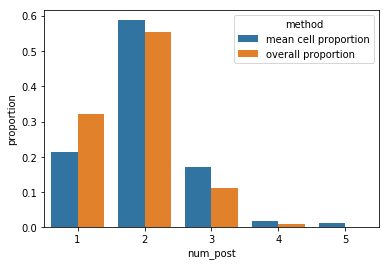

In [137]:
sns.barplot(x='num_post', y='proportion', hue='method', data=adicp)

Overall proportion is just the total number of synapses in that category, divided by the total number of synapses

Mean cell proportion: 
For each category (biadic, triadic ...)